# SOC 210B Assignment 5
_By M. Nolan Gray_

In [1]:
# Importing libraries, checking out the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [2]:
dtafile = './Data/nlsw88.dta'
df = pd.read_stata(dtafile)
df.sample(5)

,idcode,age,race,married,never_married,grade,collgrad,south,smsa,c_city,industry,occupation,union,wage,hours,ttl_exp,tenure
1132,2640,41,black,single,0,13.0,college grad,1,SMSA,0,Professional Services,Managers/admin,nonunion,9.355874,48.0,15.153847,6.000000
698,1703,45,white,single,0,13.0,not college grad,0,SMSA,1,Finance/Ins/Real Estate,Sales,nonunion,4.879225,40.0,12.961538,1.750000
1537,3534,37,white,married,0,16.0,college grad,0,nonSMSA,0,Public Administration,Professional/technical,nonunion,8.679548,12.0,12.057693,2.916667
2052,4724,40,white,married,0,12.0,not college grad,1,nonSMSA,0,Public Administration,Sales,nonunion,4.412238,40.0,11.000000,1.916667
1830,4237,38,white,married,0,9.0,not college grad,0,SMSA,0,Wholesale/Retail Trade,Sales,NaN,3.919314,32.0,10.294871,1.166667


## Question 1

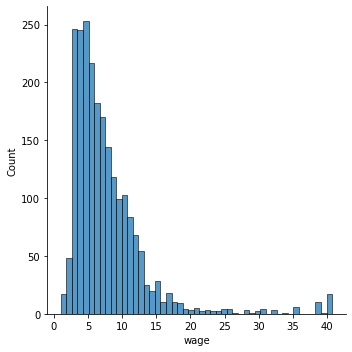

In [3]:
sns.displot(df, x="wage")

As I understand, this distribution calls for a Poisson regression.

## Question 2

In [4]:
from statsmodels.formula.api import glm
from statsmodels.genmod.families import Poisson
import patsy

In [5]:
fam = Poisson()
f = 'wage ~ collgrad + south + C(race) + never_married + C(smsa)'
y, X = patsy.dmatrices(f, df, return_type='matrix')
p_model = sm.GLM(y, X, family=fam)
result = p_model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   wage   No. Observations:                 2246
Model:                            GLM   Df Residuals:                     2239
Model Family:                 Poisson   Df Model:                            6
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7174.3
Date:                Fri, 18 Feb 2022   Deviance:                       5956.6
Time:                        07:07:23   Pearson chi2:                 8.45e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [6]:
# 8,450 Pearson chi1 at 6 df -> P-value = <0.001; not sure why the output isn't automatically including that.

## Question 3

In [7]:
# I think there are machine learning that would solve this for me 
# but I couldn't get them to work! Manual backwards elemination...
f1 = 'wage ~ collgrad + south + never_married + C(smsa)'
y1, X1 = patsy.dmatrices(f1, df, return_type='matrix')
p_model1 = sm.GLM(y1, X1, family=fam)
result1 = p_model1.fit()
print(result1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   wage   No. Observations:                 2246
Model:                            GLM   Df Residuals:                     2241
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7192.7
Date:                Fri, 18 Feb 2022   Deviance:                       5993.4
Time:                        07:07:23   Pearson chi2:                 8.56e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [8]:
# Still significant
f2 = 'wage ~ collgrad + south + C(smsa)'
y2, X2 = patsy.dmatrices(f2, df, return_type='matrix')
p_model2 = sm.GLM(y2, X2, family=fam)
result2 = p_model2.fit()
print(result2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   wage   No. Observations:                 2246
Model:                            GLM   Df Residuals:                     2242
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7193.1
Date:                Fri, 18 Feb 2022   Deviance:                       5994.2
Time:                        07:07:23   Pearson chi2:                 8.56e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

At this point, all variables are significant. Removing any further variables wouldn't improve the model.